# Project: House Price Prediction
This project aims to predict house prices based on various features such as size, location, number of rooms, etc. You will explore, prepare, and analyze the data, then build a regression model to make predictions.

## Step 1: Importing and Exploring the Data
1. Import the necessary libraries: `pandas`, `numpy`, and `matplotlib`.
2. Load the dataset (e.g., `house_prices.csv`).
3. Display the first few rows of the dataset to understand its structure.
4. Analyze descriptive statistics of the data (mean, median, etc.).
5. Check for missing values in the columns.

Imports

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Load the dataset

In [158]:
df = pd.read_csv("data/house-prices/train.csv")
df_test = pd.read_csv("data/house-prices/test.csv")

Display rows

In [159]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [160]:
data_shape = df.shape
data_shape

(1460, 81)

In [161]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [162]:
# Statistics
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Analyze missing values

In [163]:
df.isna().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [164]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)
df['GarageType'] = df['GarageType'].fillna('NoGarage')
df['GarageCond'] = df['GarageCond'].fillna('NoGarage')
df['GarageFinish'] = df['GarageFinish'].fillna('NoGarage')
df['GarageQual'] = df['GarageQual'].fillna('NoGarage')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna('NoGarage')

df['BsmtFinType1'] = df['BsmtFinType1'].fillna('NoBasement')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('NoBasement')
df['BsmtExposure'] = df['BsmtExposure'].fillna('NoBasement')
df['BsmtQual'] = df['BsmtQual'].fillna('NoBasement')
df['BsmtCond'] = df['BsmtCond'].fillna('NoBasement')

df['Alley'] = df['Alley'].fillna('NoAlley')

df['PoolQC'] = df['PoolQC'].fillna('NoPool')

df['MiscFeature'] = df['MiscFeature'].fillna('NoMiscFeature')

df['Fence'] = df['Fence'].fillna('NoFence')

df['MasVnrType'] = df['MasVnrType'].fillna('NoMasVnrType')

df['FireplaceQu'] = df['FireplaceQu'].fillna('NoFireplace')

df.dropna(inplace=True, axis=0, subset=["MasVnrArea", "Electrical"])

df.isna().sum().sort_values(ascending=False)

Id             0
CentralAir     0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 81, dtype: int64

In [165]:
df_test['LotFrontage'] = df_test.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)
df_test['GarageType'] = df_test['GarageType'].fillna('NoGarage')
df_test['GarageCond'] = df_test['GarageCond'].fillna('NoGarage')
df_test['GarageFinish'] = df_test['GarageFinish'].fillna('NoGarage')
df_test['GarageQual'] = df_test['GarageQual'].fillna('NoGarage')
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna('NoGarage')

df_test['BsmtFinType1'] = df_test['BsmtFinType1'].fillna('NoBasement')
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].fillna('NoBasement')
df_test['BsmtExposure'] = df_test['BsmtExposure'].fillna('NoBasement')
df_test['BsmtQual'] = df_test['BsmtQual'].fillna('NoBasement')
df_test['BsmtCond'] = df_test['BsmtCond'].fillna('NoBasement')

df_test['Alley'] = df_test['Alley'].fillna('NoAlley')

df_test['PoolQC'] = df_test['PoolQC'].fillna('NoPool')

df_test['MiscFeature'] = df_test['MiscFeature'].fillna('NoMiscFeature')

df_test['Fence'] = df_test['Fence'].fillna('NoFence')

df_test['MasVnrType'] = df_test['MasVnrType'].fillna('NoMasVnrType')

df_test['FireplaceQu'] = df_test['FireplaceQu'].fillna('NoFireplace')

df_test.dropna(inplace=True, axis=0, subset=["MasVnrArea", "Electrical"])

df_test.isna().sum().sort_values(ascending=False)

MSZoning         4
BsmtFullBath     2
BsmtHalfBath     2
Functional       2
Utilities        2
                ..
ExterQual        0
MasVnrArea       0
MasVnrType       0
RoofMatl         0
SaleCondition    0
Length: 80, dtype: int64

## Step 2: Visualizing the Data
1. Create a histogram to visualize the distribution of prices.
2. Make a scatter plot between two variables (e.g., size and price).
3. Identify relationships between variables using a correlation heatmap.

Create histogram for the distribution of prices

<Figure size 1000x600 with 0 Axes>

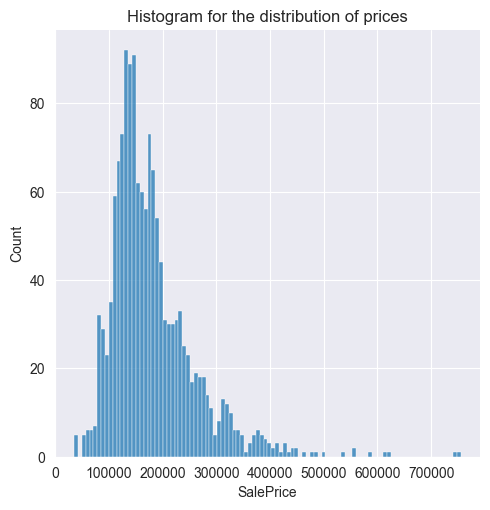

In [166]:
plt.figure(figsize=(10, 6))
sns.displot(df["SalePrice"], bins=100)
plt.title('Histogram for the distribution of prices')
plt.show()

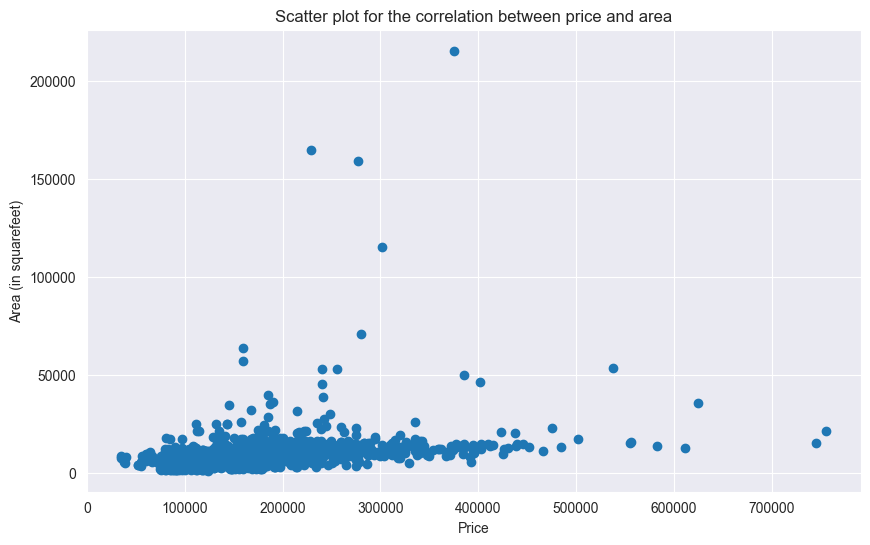

In [167]:
plt.figure(figsize=(10, 6))
plt.scatter(df['SalePrice'], df['LotArea'])
plt.xlabel('Price')
plt.ylabel('Area (in squarefeet)')
plt.title('Scatter plot for the correlation between price and area')
plt.show()

Correlation Matrix heatmap

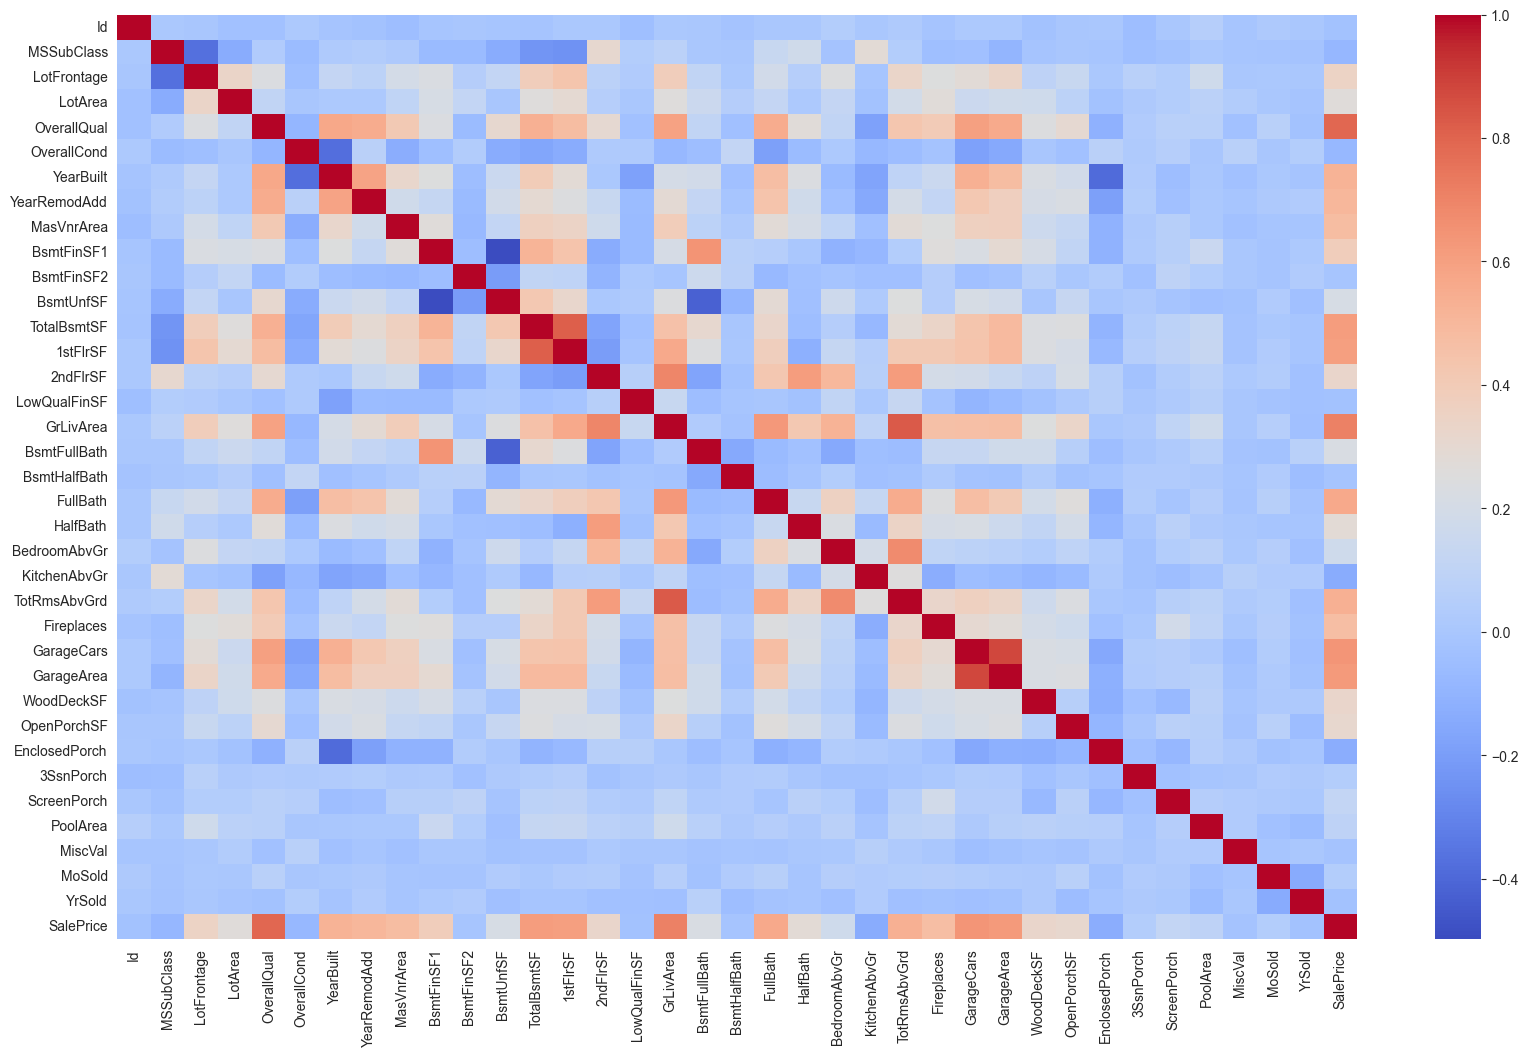

In [168]:
corr_mat = df.corr(numeric_only=True)
plt.figure(figsize=(20, 12))
sns.heatmap(corr_mat, cmap='coolwarm', fmt=".2f")
plt.show()

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

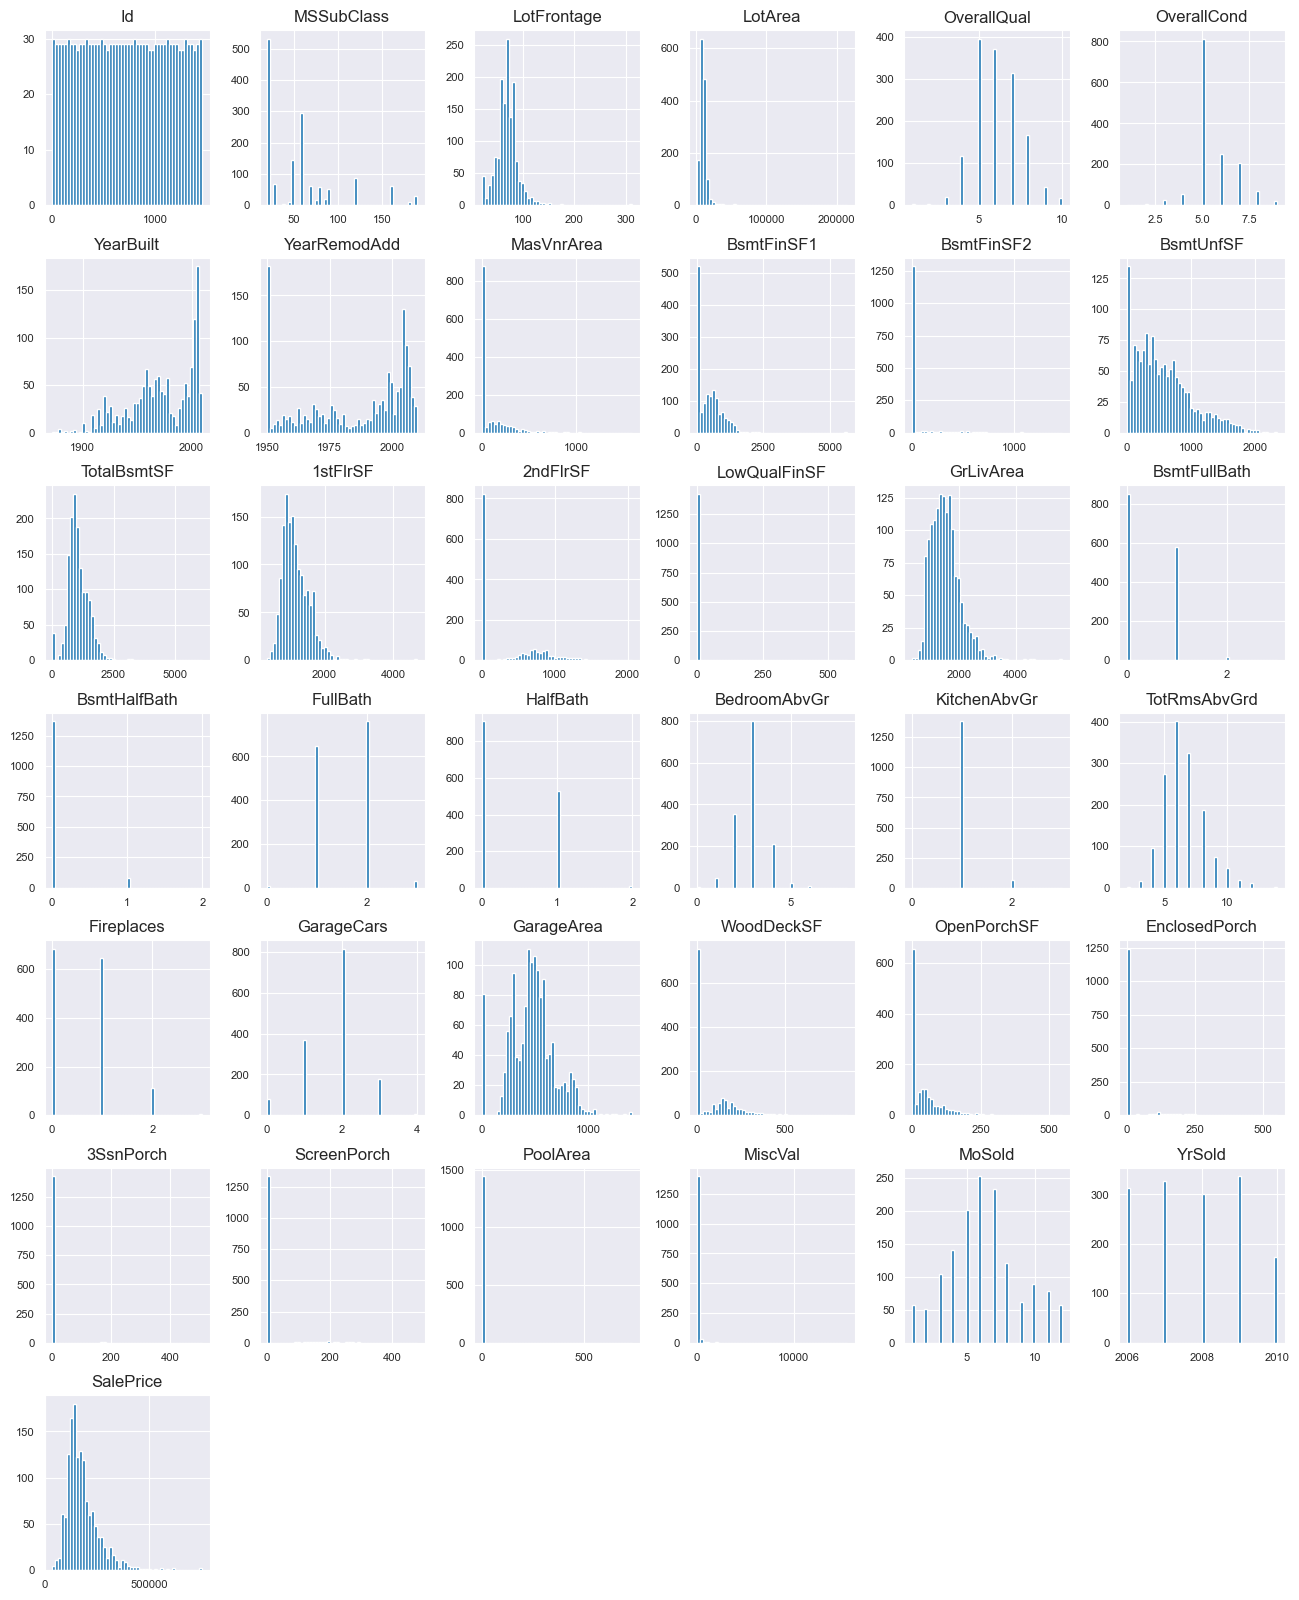

In [169]:
df_num = df.select_dtypes(include=["float64", "int64"])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)


## Step 3: Data Preparation
1. Handle missing values (fill or drop rows/columns).
2. Encode categorical variables if necessary (e.g., `One-Hot Encoding`).
3. Split the data into training and testing sets (80% / 20%).

In [170]:
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-1.727674,0.072441,RL,-0.230942,-0.205996,Pave,NoAlley,Reg,Lvl,AllPub,...,-0.068905,NoPool,NoFence,NoMiscFeature,-0.087961,-1.600006,0.138985,WD,Normal,0.351592
1,-1.725302,-0.872386,RL,0.437425,-0.090876,Pave,NoAlley,Reg,Lvl,AllPub,...,-0.068905,NoPool,NoFence,NoMiscFeature,-0.087961,-0.488657,-0.613506,WD,Normal,0.011047
2,-1.722930,0.072441,RL,-0.097269,0.074297,Pave,NoAlley,IR1,Lvl,AllPub,...,-0.068905,NoPool,NoFence,NoMiscFeature,-0.087961,0.993142,0.138985,WD,Normal,0.540783
3,-1.720558,0.308648,RL,-0.453731,-0.095881,Pave,NoAlley,IR1,Lvl,AllPub,...,-0.068905,NoPool,NoFence,NoMiscFeature,-0.087961,-1.600006,-1.365998,WD,Abnorml,-0.512382
4,-1.718186,0.072441,RL,0.615656,0.375612,Pave,NoAlley,IR1,Lvl,AllPub,...,-0.068905,NoPool,NoFence,NoMiscFeature,-0.087961,2.104491,0.138985,WD,Normal,0.875021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.723526,0.072441,RL,-0.364615,-0.259352,Pave,NoAlley,Reg,Lvl,AllPub,...,-0.068905,NoPool,NoFence,NoMiscFeature,-0.087961,0.622692,-0.613506,WD,Normal,-0.070935
1456,1.725898,-0.872386,RL,0.660214,0.266998,Pave,NoAlley,Reg,Lvl,AllPub,...,-0.068905,NoPool,MnPrv,NoMiscFeature,-0.087961,-1.600006,1.643969,WD,Normal,0.370511
1457,1.728270,0.308648,RL,-0.186384,-0.146734,Pave,NoAlley,Reg,Lvl,AllPub,...,-0.068905,NoPool,GdPrv,Shed,4.937397,-0.488657,1.643969,WD,Normal,1.083132
1458,1.730642,-0.872386,RL,-0.097269,-0.079164,Pave,NoAlley,Reg,Lvl,AllPub,...,-0.068905,NoPool,NoFence,NoMiscFeature,-0.087961,-0.859106,1.643969,WD,Normal,-0.485580


In [171]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols.extend(['MSSubClass'])
print(cat_cols)
df_without_categorical = df.drop(columns=cat_cols)
df_test.drop(columns=cat_cols, inplace=True)
cat_cols_to_add = ['Alley', 'LotShape', 'Neighborhood', 'Street', 'GarageType']
df_with_five_categorical = df.drop(columns=[cat_var for cat_var in cat_cols if cat_var not in cat_cols_to_add])

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass']


In [172]:
#one-hot encoding
#df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=False)
#df_test_encoded = pd.get_dummies(df_test, columns=cat_cols, drop_first=False)
df_test_encoded = df_test
df_encoded = df_without_categorical

## Step 4: Building a Regression Model
1. Import the `scikit-learn` library.
2. Create a simple linear regression model and train it on the training set.
3. Display the model's coefficients.

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

train_cols = set(df_encoded.columns)
test_cols = set(df_test_encoded.columns)
for col in train_cols - test_cols:
    df_test_encoded[col] = 0
for col in test_cols - train_cols:
    df_encoded[col] = 0
df_encoded = df_encoded[df_test_encoded.columns]

assert list(df_encoded.columns) == list(df_test_encoded.columns)

# 
X = df_encoded.drop(columns=['SalePrice'])
y = df_encoded['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [174]:
import joblib

joblib.dump(model, "model.pkl")
joblib.dump(list(X.columns), "columns.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

## Step 5: Model Evaluation
1. Predict prices on the test set.
2. Evaluate the model using metrics such as RMSE, MAE, or R².
3. Analyze the errors and identify cases where the model performed poorly.

In [175]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

mse_original = mse * (scaler.scale_[-1] ** 2)  # Remettre à l'échelle
rmse_original = np.sqrt(mse_original)  # Erreur moyenne quadratique
print(f"MSE (échelle originale) : {mse_original}")
print(f"RMSE (échelle originale) : {rmse_original}")

Mean Squared Error: 0.13033597303358135
R² Score: 0.8531469098720114
MSE (échelle originale) : 819302153.2519839
RMSE (échelle originale) : 28623.45460023971


A RMSE of 28623 means that the predictions are close of 28623$ from the original price of the house. In our case, it looks good. However, we removed all the categorical columns. To upgrade our model, we will try to add some categorical columns to check if this produce a better result.

## Step 6: Improving the Model
1. Try other regression models, such as Ridge or Lasso regression.
2. Perform hyperparameter tuning (e.g., using `GridSearchCV`).
3. Compare the performance of different models.

#### Step 6.1 : Improving the model by adding some categorical columns
We will add 5 categorical columns and see the difference

In [176]:
# One hot encoding
df_with_five_categorical_encoded = pd.get_dummies(df_with_five_categorical, columns=cat_cols_to_add, drop_first=False)
X1 = df_with_five_categorical_encoded.drop(columns=["SalePrice"])
y1 = df_with_five_categorical_encoded["SalePrice"]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

y1_pred = model1.predict(X1_test)

Check the stats

In [177]:
mse = mean_squared_error(y1_test, y1_pred)
r2 = r2_score(y1_test, y1_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

mse_original = mse * (scaler.scale_[-1] ** 2)
rmse_original = np.sqrt(mse_original)
print(f"MSE (échelle originale) : {mse_original}")
print(f"RMSE (échelle originale) : {rmse_original}")

Mean Squared Error: 0.1053812492007269
R² Score: 0.8812640767818792
MSE (échelle originale) : 662434801.1756816
RMSE (échelle originale) : 25737.80878737896


As we can see, the RMSE as dropped, so it means our model is a bit more accurate. Knowing this, we will add some more categorical values and analyze when the RMSE starts to drop because of too parameters to take in account for a linear regression.

In [178]:
"""
- On prend la liste des colonnes et on boucle dessus
- Dictionnaire pour associer une itération à une liste contenant R2, MSE et RMSE
- Fonction qu'on appelle pour le modèle

---

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass']
"""
def encode_dataframe(dataframe, iteration, cols_to_add):
    return pd.get_dummies(dataframe, columns=cols_to_add[:iteration], drop_first=False)

def train_model(dataframe):
    X = dataframe.drop(columns=["SalePrice"])
    y = dataframe["SalePrice"]
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # for metrics
    y_pred = model.predict(X_test)
    return [X_train, X_test, y_train, y_test, y_pred]

def analyze_metrics(data, iteration, d):    
    mse = mean_squared_error(data[3], data[4])
    r2 = r2_score(data[3], data[4])
    rmse = np.sqrt(mse * (scaler.scale_[-1] ** 2))
    d[iteration] = [r2, rmse, rmse <= 200000]


d_metrics = dict()
for i in range(len(cat_cols)):
    cols_to_have = cat_cols[:i]
    dfm_first_step = df.drop(columns=[col for col in cat_cols if col not in cols_to_have])
    dfm = encode_dataframe(dataframe=dfm_first_step, iteration=i, cols_to_add=cat_cols)
    analyze_metrics(data=train_model(dfm), iteration=i, d=d_metrics)
d_metrics

{0: [0.8329690369160148, 33617.999070881815, True],
 1: [0.8047000288142844, 35926.287765429355, True],
 2: [0.8494931051854377, 29027.21524441667, True],
 3: [0.8614568992638535, 27156.590721640267, True],
 4: [0.7689741536956248, 38330.115620500954, True],
 5: [0.7566506313699399, 40838.575722330155, True],
 6: [0.8509620439681312, 27582.240882718776, True],
 7: [0.8264796230186461, 34561.11455669591, True],
 8: [0.8173900691298115, 29992.735832172384, True],
 9: [0.7652953762058751, 40614.67775290195, True],
 10: [0.8420962314440341, 32164.949020267326, True],
 11: [-1.7286429840952197e+18, 109449734318672.7, False],
 12: [-2.8216359978870984e+18, 108435236384021.0, False],
 13: [-1.2303054693279469e+20, 777946748447284.9, False],
 14: [-1.2067304677491073e+19, 270171814240561.22, False],
 15: [-1.2403947166681022e+20, 936742633508291.4, False],
 16: [-1.8392268553980252e+21, 3707832448342741.5, False],
 17: [-4.127289090011869e+18, 162824705851464.78, False],
 18: [-248974831933746

In [179]:
r2_values = [d_metrics[i][0] for i in d_metrics.keys()]
rmse_values = [d_metrics[i][1] for i in d_metrics.keys()]

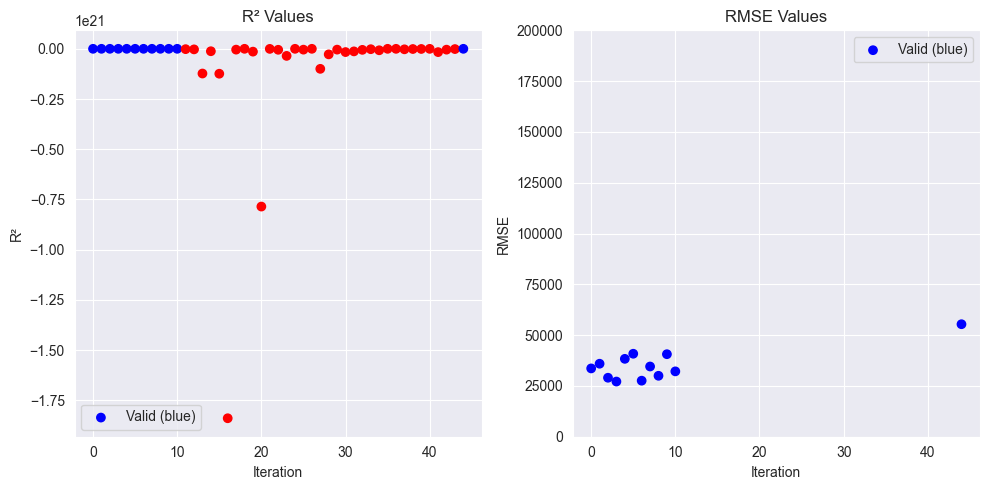

In [180]:
iterations = list(d_metrics.keys())
r2_values = [d_metrics[i][0] for i in iterations]
rmse_values = [d_metrics[i][1] for i in iterations]
validity = [d_metrics[i][2] for i in iterations]

colors = ['blue' if valid else 'red' for valid in validity]

figure, axis = plt.subplots(1, 2, figsize=(10, 5))

# Graphique R²
axis[0].scatter(iterations, r2_values, c=colors, label='R² values')
axis[0].set_title("R² Values")
axis[0].set_xlabel("Iteration")
axis[0].set_ylabel("R²")
axis[0].legend(["Valid (blue)", "Problematic (red)"])

# Graphique RMSE
axis[1].scatter(iterations, rmse_values, c=colors, label='RMSE values')
axis[1].set_title("RMSE Values")
axis[1].set_xlabel("Iteration")
axis[1].set_ylabel("RMSE")
axis[1].set_ylim(0, 200000)
axis[1].legend(["Valid (blue)", "Problematic (red)"])

plt.tight_layout()
plt.show()


### Test with Lasso regression
In order to see other regressions, we'll see if the Lasso regression helps to have better results

In [181]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

In [182]:
mse = mean_squared_error(y_test, lasso_pred)
r2 = r2_score(y_test, lasso_pred)
rmse = np.sqrt(mse * (scaler.scale_[-1] ** 2))
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')
print(f"RMSE: {rmse}")

Mean Squared Error: 0.16255285998034885
R² Score: 0.8168472660183695
RMSE: 31965.919859832426


Without any categorical columns, the Lasso regression is not better than the Linear regression

### Test with Ridge regression

In [183]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

In [184]:
mse= mean_squared_error(y_test, ridge_pred)
r2 = r2_score(y_test, ridge_pred)
rmse = np.sqrt(mse * (scaler.scale_[-1] ** 2))
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')
print(f"RMSE: {rmse}")

Mean Squared Error: 0.1303312332013463
R² Score: 0.8531522503700658
RMSE: 28622.934131473052


The Ridge regression is not better than the Linear regression. We can conclude that the Linear regression is the best model for our dataset.

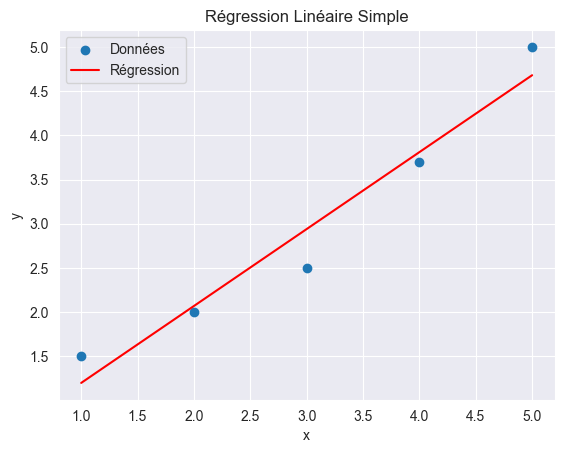

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Exemple de données
x = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([1.5, 2.0, 2.5, 3.7, 5.0])

# Régression linéaire
model = LinearRegression().fit(x, y)
y_pred = model.predict(x)

# Visualisation
plt.scatter(x, y, label="Données")
plt.plot(x, y_pred, color="red", label="Régression")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Régression Linéaire Simple")
plt.legend()
plt.show()


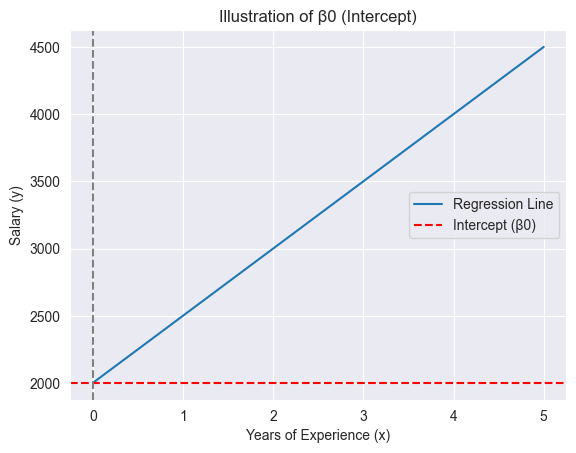

In [186]:
import numpy as np
import matplotlib.pyplot as plt

# Define the line
x = np.linspace(0, 5, 100)
beta_0 = 2000  # Intercept
beta_1 = 500   # Slope
y = beta_0 + beta_1 * x

# Plot
plt.plot(x, y, label="Regression Line")
plt.axhline(beta_0, color="red", linestyle="--", label="Intercept (β0)")
plt.axvline(0, color="gray", linestyle="--")  # y-axis
plt.xlabel("Years of Experience (x)")
plt.ylabel("Salary (y)")
plt.title("Illustration of β0 (Intercept)")
plt.legend()
plt.show()

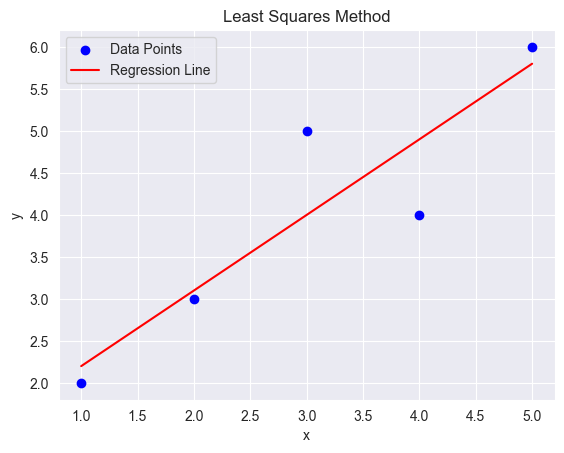

In [187]:
import numpy as np
import matplotlib.pyplot as plt

# Data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 5, 4, 6])

# Regression coefficients
beta_1 = 0.9
beta_0 = 1.3

# Regression line
y_pred = beta_0 + beta_1 * x

# Plot
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Squares Method')
plt.legend()
plt.show()


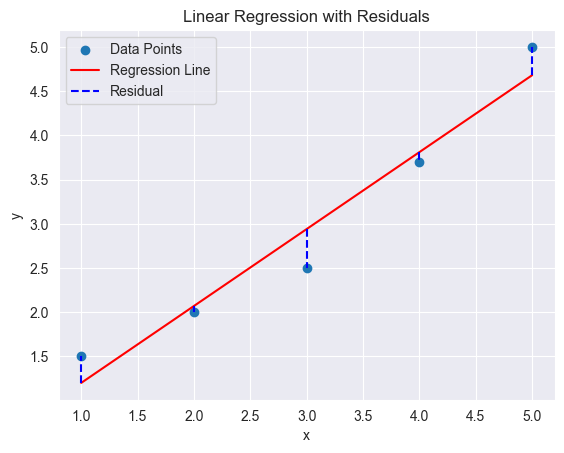

In [188]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Example data
x = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([1.5, 2.0, 2.5, 3.7, 5.0])

# Linear regression
model = LinearRegression().fit(x, y)
y_pred = model.predict(x)

# Residuals
residuals = y - y_pred

# Visualization
plt.scatter(x, y, label="Data Points")
plt.plot(x, y_pred, color="red", label="Regression Line")
# Plot residuals
for i in range(len(x)):
    plt.vlines(x[i], y_pred[i], y[i], colors='blue', linestyles='dashed', label="Residual" if i == 0 else "")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression with Residuals")
plt.legend()
plt.show()


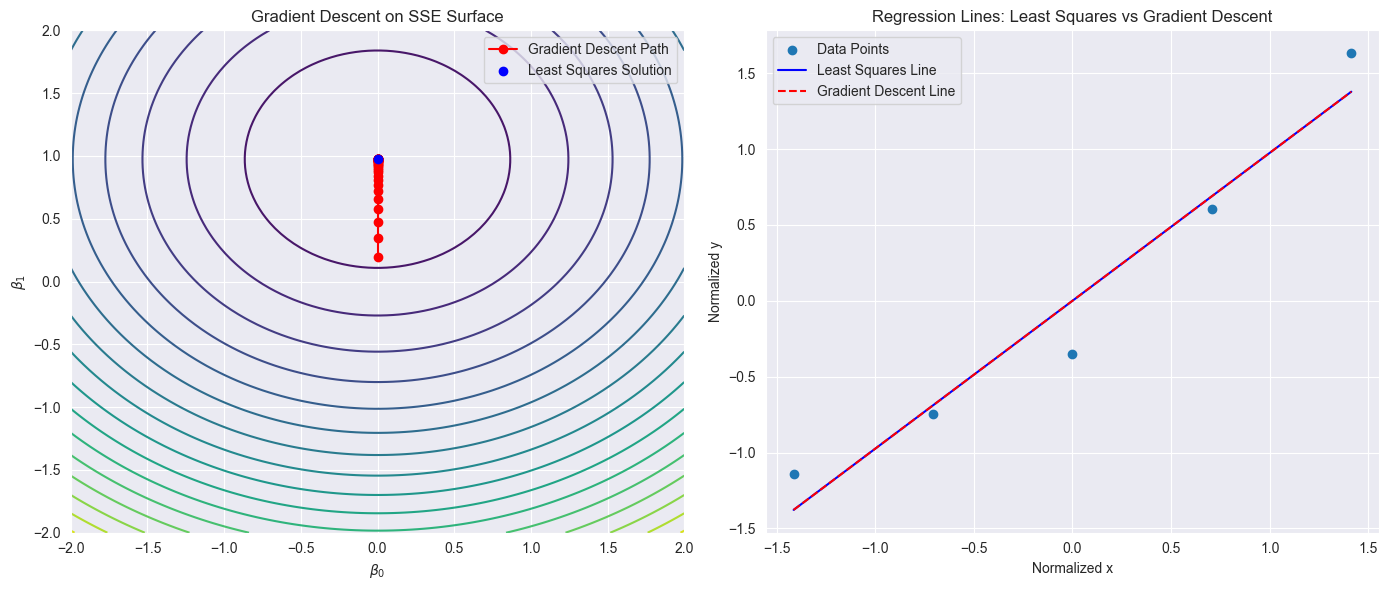

In [189]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([1.5, 2.0, 2.5, 3.7, 5.0])

# Normalize x and y for better convergence
x_norm = (x - np.mean(x)) / np.std(x)
y_norm = (y - np.mean(y)) / np.std(y)

# Initialize parameters for gradient descent
beta_0, beta_1 = 0, 0
learning_rate = 0.1
iterations = 50
history = []

# Gradient Descent
for _ in range(iterations):
    y_pred = beta_0 + beta_1 * x_norm
    error = y_pred - y_norm
    grad_beta_0 = 2 * np.sum(error) / len(x_norm)
    grad_beta_1 = 2 * np.sum(error * x_norm) / len(x_norm)
    
    beta_0 -= learning_rate * grad_beta_0
    beta_1 -= learning_rate * grad_beta_1
    
    # Record values for plotting
    history.append((beta_0, beta_1, np.sum(error**2)))

# Final Least Squares solution for comparison
X = np.vstack((np.ones(len(x_norm)), x_norm)).T
beta_ls = np.linalg.inv(X.T @ X) @ X.T @ y_norm

# Plot the results
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Left plot: Gradient Descent steps on the cost surface
B0, B1 = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
SSE = np.array([
    np.sum((b0 + b1 * x_norm - y_norm)**2) for b0, b1 in zip(B0.ravel(), B1.ravel())
]).reshape(B0.shape)
ax[0].contour(B0, B1, SSE, levels=20, cmap="viridis")
ax[0].plot([h[0] for h in history], [h[1] for h in history], 'ro-', label="Gradient Descent Path")
ax[0].scatter(beta_ls[0], beta_ls[1], color="blue", label="Least Squares Solution", zorder=5)
ax[0].set_title("Gradient Descent on SSE Surface")
ax[0].set_xlabel(r"$\beta_0$")
ax[0].set_ylabel(r"$\beta_1$")
ax[0].legend()

# Right plot: Fit of the regression line
y_pred_ls = beta_ls[0] + beta_ls[1] * x_norm
y_pred_gd = beta_0 + beta_1 * x_norm
ax[1].scatter(x_norm, y_norm, label="Data Points")
ax[1].plot(x_norm, y_pred_ls, label="Least Squares Line", color="blue")
ax[1].plot(x_norm, y_pred_gd, label="Gradient Descent Line", color="red", linestyle="--")
ax[1].set_title("Regression Lines: Least Squares vs Gradient Descent")
ax[1].set_xlabel("Normalized x")
ax[1].set_ylabel("Normalized y")
ax[1].legend()

plt.tight_layout()
plt.show()


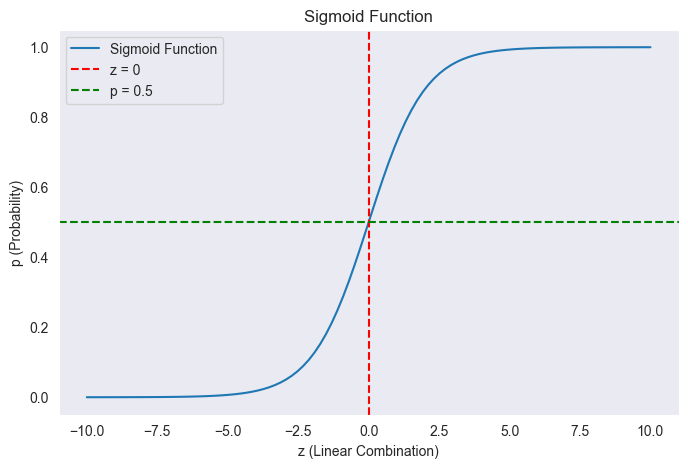

In [190]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Values for z
z = np.linspace(-10, 10, 100)
p = sigmoid(z)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(z, p, label="Sigmoid Function")
plt.axvline(0, color='red', linestyle='--', label="z = 0")
plt.axhline(0.5, color='green', linestyle='--', label="p = 0.5")
plt.title("Sigmoid Function")
plt.xlabel("z (Linear Combination)")
plt.ylabel("p (Probability)")
plt.legend()
plt.grid()
plt.show()
